### Titanic

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb

from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
titanic_df = pd.read_csv('titanic.csv')


In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Male vs Female Passengers')

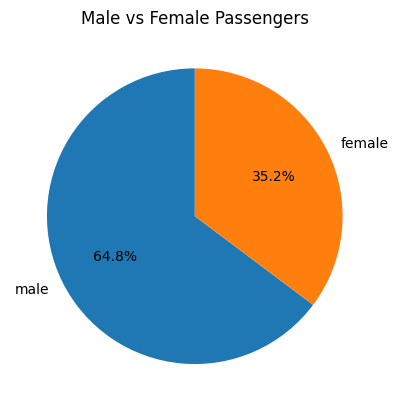

In [7]:
gender_counts = titanic_df['Sex'].value_counts()
pl.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
pl.title('Male vs Female Passengers')

Text(0.5, 1.0, 'Distribution of Passenger Ages')

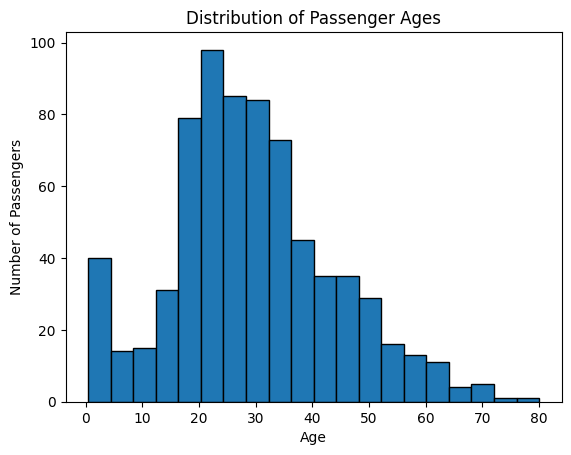

In [8]:
pl.hist(titanic_df['Age'].dropna(), bins=20, edgecolor='black')
pl.xlabel('Age')
pl.ylabel('Number of Passengers')
pl.title('Distribution of Passenger Ages')

Text(0.5, 1.0, 'Number of Passengers Survived vs Not Survived')

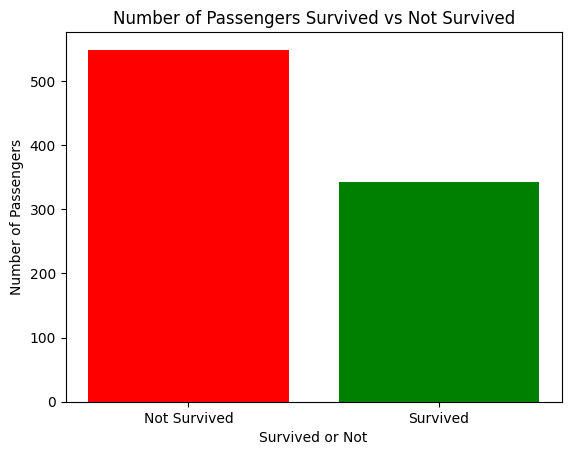

In [11]:
survival_counts = titanic_df['Survived'].value_counts()
pl.bar(['Not Survived', 'Survived'], survival_counts, color=['red', 'green'])
pl.xticks(rotation=0)
pl.xlabel('Survived or Not')
pl.ylabel('Number of Passengers')
pl.title('Number of Passengers Survived vs Not Survived')

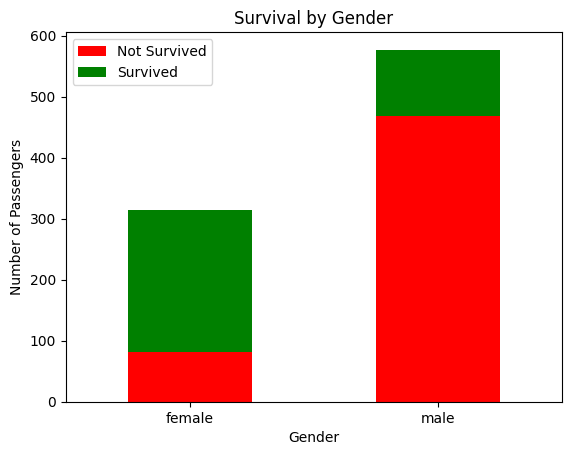

In [12]:
survival_gender_counts = titanic_df.groupby(['Sex', 'Survived']).size().unstack()
survival_gender_counts.plot(kind='bar', stacked=True, color=['red', 'green'])
pl.xticks(rotation=0)
pl.xlabel('Gender')
pl.ylabel('Number of Passengers')
pl.title('Survival by Gender')
pl.legend(['Not Survived', 'Survived'])

Text(0.5, 1.0, 'Fare vs Age')

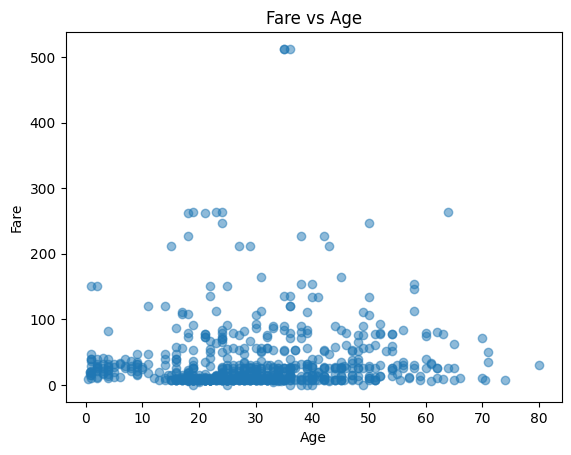

In [13]:
pl.scatter(titanic_df['Age'], titanic_df['Fare'], alpha=0.5)
pl.xlabel('Age')
pl.ylabel('Fare')
pl.title('Fare vs Age')

In [16]:
age_mean = titanic_df['Age'].mean()
titanic_df['Age'].fillna(age_mean, inplace=True)

scaler = StandardScaler()
titanic_df['Fare'] = scaler.fit_transform(titanic_df[['Fare']])

sex_encoded = pd.get_dummies(titanic_df['Sex'], drop_first=True)
titanic_data = pd.concat([titanic_df, sex_encoded], axis=1)

titanic_data.drop('Sex', axis=1, inplace=True)

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502445,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.488854,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.420730,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,-0.486337,NaN,S
